In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [66]:
# Load tide data from a CSV file
with open('data.txt', 'r') as infile:
    tide_data = infile.read().split('\n')
    
day = []
time = []
height = []

def militaryTimeToDay(time):
    hour, minute = map(int, time.split(':'))
    return hour / 24 + minute / 1440

for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != '']
    #print(lineData)
    day.append(int(lineData[0]))
    time.append(militaryTimeToDay(lineData[1]))
    height.append(float(lineData[2]))

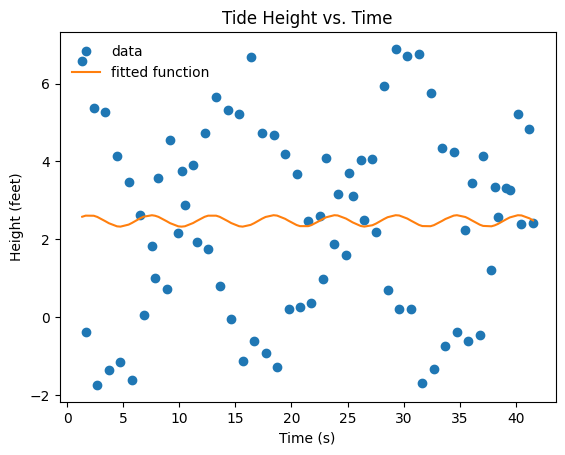

In [68]:
x = np.array(day) + np.array(time)

# print(x)
y = np.array(height)
y_err = np.ones_like(y) * 0.25


# Define the oscillatory function
def func(x, a, b, c, d):
    return a * np.sin((b * x) + c) + d


# Fit the oscillatory function to the tide data
params, _ = curve_fit(func, x, y, sigma=y_err)


# fit_y = func(x, a_fit, b_fit, c_fit, d_fit)

fit_y = func(x, *params)

#print("Fit_y: " + str(fit_y))
# Plot the tide data and the fitted function

plt.plot(x, y, "o", label="data")
plt.plot(x, fit_y, label="fitted function")
plt.xlabel("Time (s)")
plt.ylabel("Height (feet)")
plt.title("Tide Height vs. Time")
plt.legend(frameon=False)
plt.show()